In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
df_train=pd.read_csv('gisette_train.data',sep=" ")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Columns: 5001 entries, 550 to Unnamed: 5000
dtypes: float64(1), int64(5000)
memory usage: 228.9 MB


In [4]:
df_test=pd.read_csv('gisette_valid.data',sep=' ')
df_test.head()

,688,0,0.1,0.2,0.3,0.4,0.5,952,0.6,870,...,0.4436,0.4437,0.4438,0.4439,0.4440,494,0.4441,769.1,0.4442,Unnamed: 5000
0,778,758,0,0,0,0,0,708,0,991,...,0,0,770,0,0,0,0,0,0,NaN
1,469,0,816,0,0,0,0,0,0,0,...,0,0,467,0,0,0,417,0,0,NaN
2,0,0,0,0,0,571,991,983,0,983,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,949,0,991,...,0,0,0,0,0,0,0,976,0,NaN
4,0,0,0,0,0,0,0,0,0,450,...,0,0,0,0,0,800,0,0,0,NaN


In [5]:
df_train.head()

,550,0,495,0.1,0.2,0.3,0.4,976,0.5,0.6,...,0.3856,0.3857,991.153,991.154,0.3858,0.3859,0.3860,0.3861,983.409,Unnamed: 5000
0,0,0,0,0,0,0,0,976,0,0,...,475,0,991,0,0,991,0,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,674,0,0,838,NaN
3,0,0,0,0,0,0,0,608,0,979,...,0,0,828,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,983,0,0,0,0,0,0,NaN


In [6]:
df_train.drop('Unnamed: 5000',axis=1,inplace=True)

In [7]:
df_test.drop('Unnamed: 5000',axis=1,inplace=True)

In [8]:
df_train.isnull().sum().sum()

0

In [9]:
df_test.isnull().sum().sum()

0

In [10]:
df_train.describe()

,550,0,495,0.1,0.2,0.3,0.4,976,0.5,0.6,...,0.3855,0.3856,0.3857,991.153,991.154,0.3858,0.3859,0.3860,0.3861,983.409
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,...,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,110.949658,11.252875,173.207535,0.951159,15.171695,50.217703,15.208868,322.964327,2.208035,146.380063,...,195.203534,111.426071,2.035673,318.427571,80.887815,44.784797,263.857643,14.723121,122.443907,153.497750
std,284.815631,91.456372,341.762699,25.774022,109.247509,194.697778,106.972549,418.363086,39.749731,317.884184,...,368.185081,276.677849,41.785393,420.776138,255.858186,185.287734,394.984287,107.003167,294.267694,326.461252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,786.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,789.500000,0.000000,0.000000,659.500000,0.000000,0.000000,0.000000
max,999.000000,999.000000,999.000000,983.000000,999.000000,999.000000,999.000000,999.000000,991.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000


In [11]:
label=pd.read_csv('gisette_train.labels')

In [12]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 1 columns):
1    5999 non-null int64
dtypes: int64(1)
memory usage: 46.9 KB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 5000 entries, 688 to 0.4442
dtypes: int64(5000)
memory usage: 38.1 MB


In [14]:
x_train=df_train
y_train=label

In [15]:
label1=pd.read_csv('gisette_valid.labels')

In [16]:
x_test=df_test
y_test=label1

## Scalling

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [18]:
x_train_sc=sc.fit_transform(x_train)

In [19]:
x_test_sc=sc.transform(x_test)

## pca

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [21]:
x_train_pca=pca.fit_transform(x_train_sc)

In [22]:
x_test_pca=pca.transform(x_test_sc)

In [23]:
x_train_pca.shape

(5999, 100)

In [24]:
x_test_pca.shape

(999, 100)

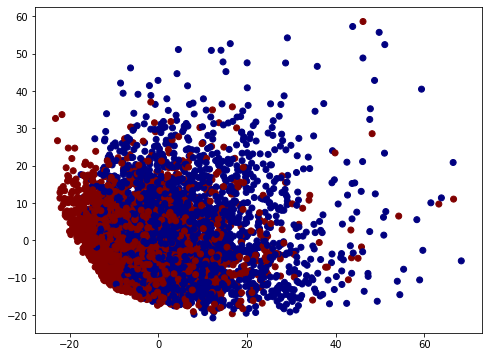

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train['1'],cmap='jet')

In [26]:
can_comp=pd.DataFrame(pca.components_,columns=x_train.columns)

In [27]:
can_comp

,550,0,495,0.1,0.2,0.3,0.4,976,0.5,0.6,...,0.3855,0.3856,0.3857,991.153,991.154,0.3858,0.3859,0.3860,0.3861,983.409
0,0.000803,0.001115,0.022711,0.000335,0.001319,-0.000022,-0.000648,-0.000672,-0.000087,0.001545,...,0.010528,0.033205,-0.003326,0.000034,0.008923,0.029399,-0.000829,0.001906,-0.000085,0.010495
1,0.001589,-0.000227,0.038783,-0.000594,0.000561,-0.000140,-0.001400,-0.001666,0.001187,0.002761,...,0.013902,-0.002427,-0.002234,-0.000658,-0.020311,-0.012425,0.001683,0.027195,0.001967,0.035901
2,-0.000322,-0.000471,0.008249,0.002490,-0.002930,-0.001275,0.002985,0.002677,0.000278,-0.001309,...,0.004549,0.013995,-0.000635,0.000052,0.010416,-0.016463,0.001112,-0.011307,0.001732,0.040592
3,-0.000903,-0.003262,0.010849,0.000706,0.002412,-0.001460,0.000423,-0.000571,0.002726,-0.000394,...,-0.027558,0.005567,0.002041,-0.001915,0.025238,0.038070,0.001342,0.004726,0.000294,0.003577
4,0.000446,0.000463,-0.040401,0.002666,0.002498,0.000562,-0.000429,0.000966,0.000821,-0.001180,...,0.002370,-0.032426,0.003317,-0.001305,0.009956,0.006513,-0.000062,-0.007308,0.000386,-0.027964
5,0.001730,0.001982,-0.020047,-0.002385,-0.000954,-0.000468,-0.000064,-0.000258,0.000495,-0.001363,...,-0.003845,-0.013060,-0.000917,0.000696,0.018227,0.015213,-0.000085,0.020998,-0.001528,-0.002195
6,0.001056,-0.003084,-0.022387,0.001045,-0.001072,-0.003753,0.000889,-0.000421,0.002189,0.001903,...,-0.010180,-0.003747,-0.008682,-0.001579,0.019638,-0.008931,-0.003106,0.004132,-0.000406,0.013469
7,-0.001243,0.000482,0.004710,0.002306,-0.000709,-0.002896,-0.002685,0.002627,-0.004866,0.000359,...,-0.012042,0.043121,0.001632,-0.000738,0.011381,-0.002963,-0.000776,0.020431,-0.001354,-0.029183
8,0.000469,0.000981,-0.009571,0.003048,0.000481,0.001539,-0.000705,0.001863,0.001698,-0.001715,...,0.000404,-0.033629,-0.005545,-0.000233,-0.012614,-0.004107,0.002566,0.020062,-0.000097,-0.022880
9,0.000288,-0.001963,0.002426,-0.001979,0.002770,-0.000715,-0.001875,0.002645,-0.001541,-0.004898,...,0.004989,0.017988,-0.006043,-0.002070,-0.004385,-0.055640,-0.001306,-0.009092,-0.002966,-0.002294


## logistic regression

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lgr=LogisticRegression()

In [31]:
lgr.fit(x_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred=lgr.predict(x_train_pca)

In [33]:
print('accuracy: ',accuracy_score(y_train,y_pred))
print('confusion matrix: \n',confusion_matrix(y_train,y_pred))
print('classification report: \n',classification_report(y_train,y_pred))

accuracy:  0.9791631938656443
confusion matrix: 
 [[2943   57]
 [  68 2931]]
classification report: 
               precision    recall  f1-score   support

          -1       0.98      0.98      0.98      3000
           1       0.98      0.98      0.98      2999

    accuracy                           0.98      5999
   macro avg       0.98      0.98      0.98      5999
weighted avg       0.98      0.98      0.98      5999



In [34]:
y_pred1=lgr.predict(x_test_pca)

In [35]:
print('accuracy: ',accuracy_score(y_test,y_pred1))
print('confusion matrix: \n',confusion_matrix(y_test,y_pred1))
print('classification report: \n',classification_report(y_test,y_pred1))

accuracy:  0.980980980980981
confusion matrix: 
 [[489  11]
 [  8 491]]
classification report: 
               precision    recall  f1-score   support

          -1       0.98      0.98      0.98       500
           1       0.98      0.98      0.98       499

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999



## knn

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

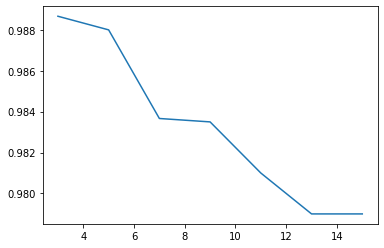

In [42]:
kvalue=[]
score_test=[]
score_train=[]
for i in range(3,16,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_pca,y_train)
    y_pred=knn.predict(x_train_pca)
    a=accuracy_score(y_train,y_pred)
    kvalue.append(i)
    score_train.append(a)
    y_pred1=knn.predict(x_test_pca)
    b=accuracy_score(y_test,y_pred1)
    score_test.append(b)
    

plt.plot(kvalue,score_train)

In [40]:
list(range(3,15,2))

[3, 5, 7, 9, 11, 13]

In [ ]:
x_train_pca.shape

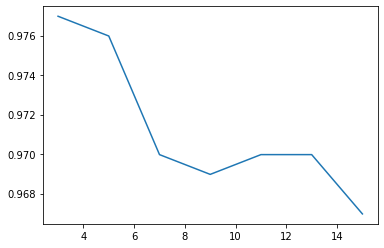

In [43]:
plt.plot(kvalue,score_test)

In [44]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [45]:
y_pred3=knn.predict(x_train_pca)

In [46]:
y_pred4=knn.predict(x_test_pca)

In [47]:
print('accuracy: ',accuracy_score(y_train,y_pred3))
print('confusion matrix: \n',confusion_matrix(y_train,y_pred3))
print('classification report: \n',classification_report(y_train,y_pred3))

accuracy:  0.9886647774629105
confusion matrix: 
 [[2971   29]
 [  39 2960]]
classification report: 
               precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3000
           1       0.99      0.99      0.99      2999

    accuracy                           0.99      5999
   macro avg       0.99      0.99      0.99      5999
weighted avg       0.99      0.99      0.99      5999



In [48]:
print('accuracy: ',accuracy_score(y_test,y_pred4))
print('confusion matrix: \n',confusion_matrix(y_test,y_pred4))
print('classification report: \n',classification_report(y_test,y_pred4))

accuracy:  0.9769769769769769
confusion matrix: 
 [[489  11]
 [ 12 487]]
classification report: 
               precision    recall  f1-score   support

          -1       0.98      0.98      0.98       500
           1       0.98      0.98      0.98       499

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999

